In [39]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [40]:
style.use('ggplot')

In [41]:
df = quandl.get('WIKI/GOOGL')

In [42]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [43]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Close'] * 100

In [44]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]

In [45]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

In [46]:
forecast_out = int(math.ceil(0.01*len(df)))

In [47]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [48]:
X = np.array(df.drop(['label'], 1))

In [49]:
X = preprocessing.scale(X)

In [50]:
X = X[:-forecast_out]

In [51]:
X_lately = X[-forecast_out:]

In [52]:
df.dropna(inplace=True)

In [53]:
y = np.array(df['label'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
# clf = LinearRegression(n_jobs=-1)
# clf.fit(X_train, y_train)
# accuracy = clf.score(X_test, y_test)

In [56]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [57]:
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

In [58]:
forecast_set = clf.predict(X_lately)

In [59]:
print(forecast_set, accuracy, forecast_out)

[1076.35904447 1090.40465161 1104.0769376  1098.96989523 1092.60494902
 1090.36374642 1088.93361847 1085.28054493 1079.53155772 1075.11043886
 1073.11119463 1091.55036162 1110.03792445 1115.38055136 1129.87989842
 1134.14981177 1132.45879501 1130.11790321 1131.84731452 1149.39695856
 1149.26292344 1158.58994664 1155.34574486 1163.43810134 1183.2344165
 1196.25498654 1190.41510886 1202.22076837 1206.93456078 1206.45664041
 1197.23303603 1202.09622681 1200.81751872 1136.48009781 1082.38752012] 0.9793147194700096 35


In [60]:
df['Forecast'] = np.nan

In [61]:
last_date = df.iloc[-1].name

In [62]:
last_unix = last_date.timestamp()

In [63]:
one_day = 86400

In [64]:
next_unix = last_unix + one_day

In [65]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]
    

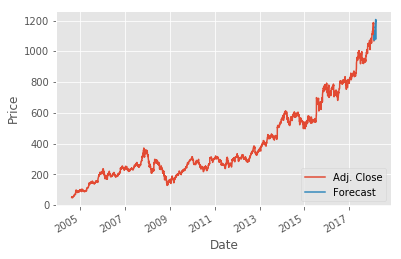

In [66]:
df['Adj. Close'].plot();
df['Forecast'].plot();
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()